In [8]:
from nilearn import plotting
from nilearn.image import mean_img

import nibabel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '/data/fmri/data/sub-tbi004/sub-tbi004.preproc/2back.r02.scale.nii.gz'


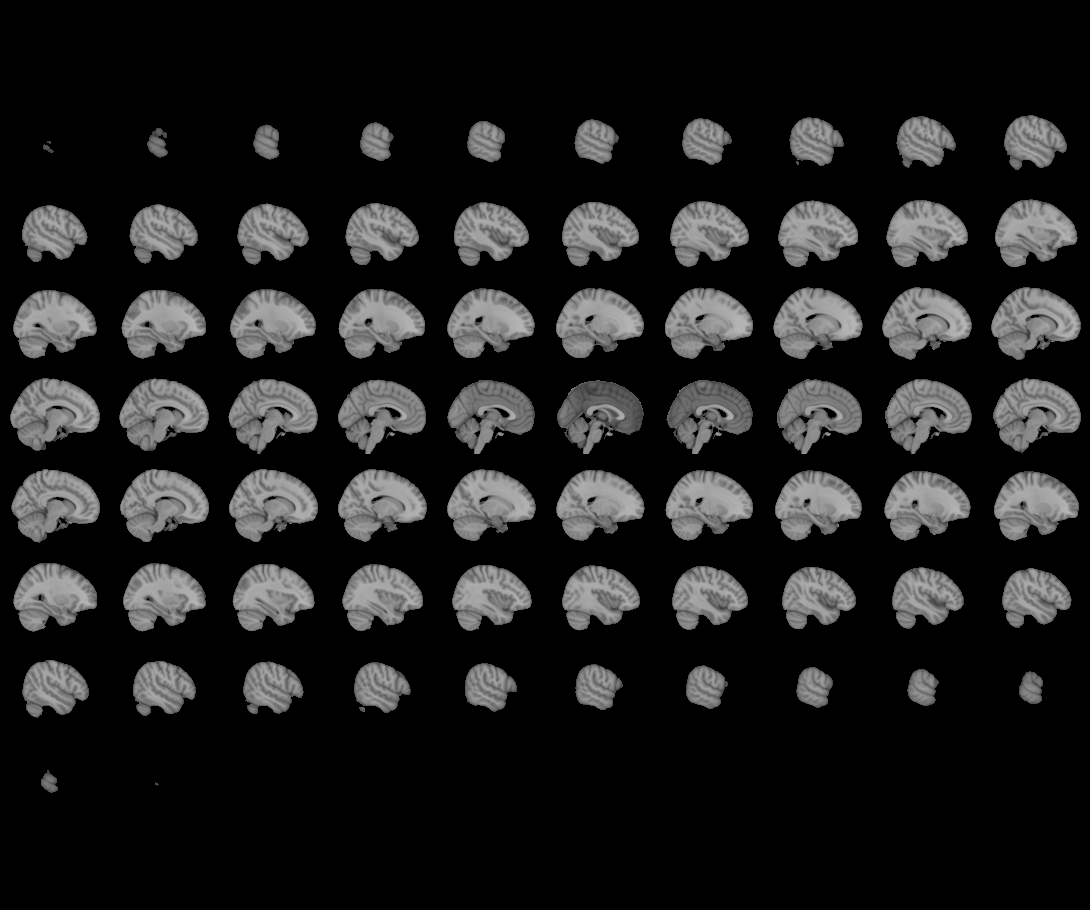
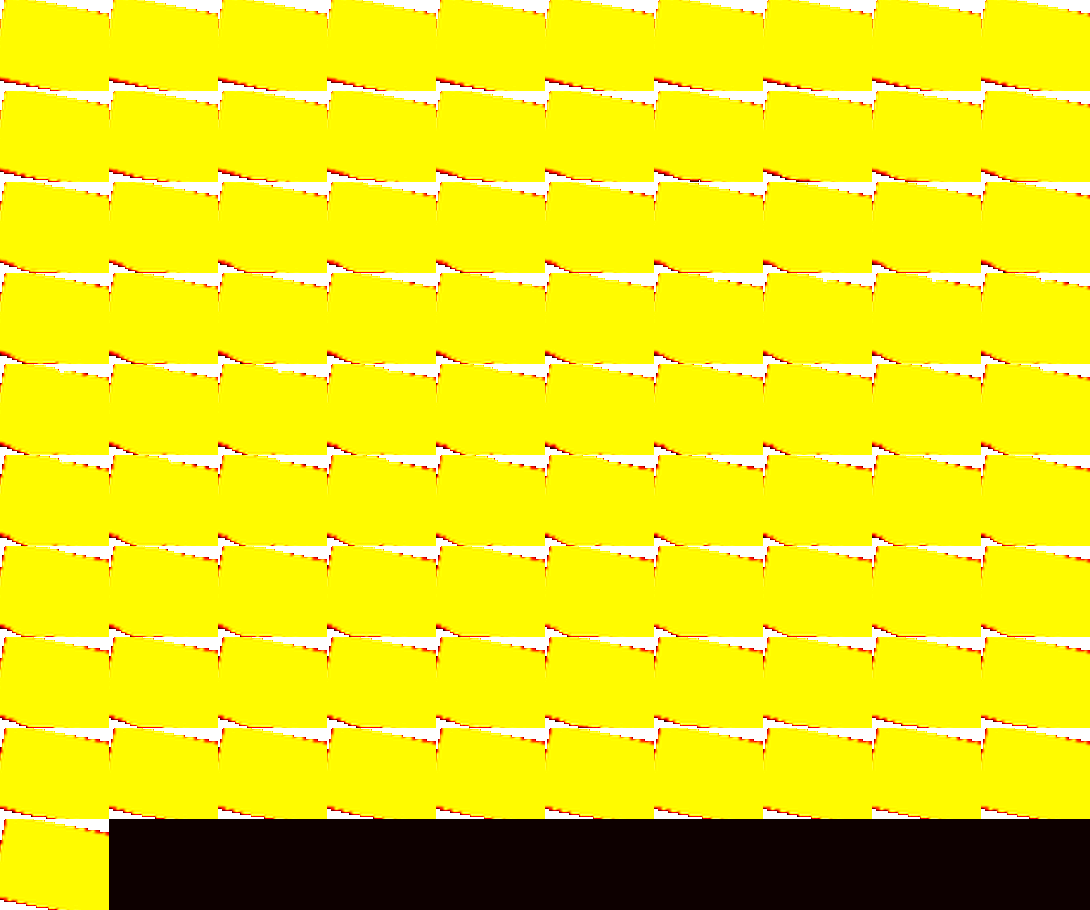

In [3]:
plotting.view_img(mean_img(file_path), threhold=None)

In [4]:
import nibabel

In [5]:
data = nibabel.load(file_path).get_fdata()

In [6]:
data.shape

(57, 68, 49, 135)

In [9]:
# Move time domain to the first axis for the following analysis: coronal, transversal, and sagittal
data = np.transpose(data, [3, 0, 1, 2])

In [54]:
# (t, x, y, z)
data.shape

(135, 57, 68, 49)

In [55]:
# Coronal is the Z-axis view (along the depth from the top)
coronal = np.transpose(data, [1, 3, 2, 0])
coronal = np.rot90(coronal, 1)
coronal.shape

(49, 57, 68, 135)

In [56]:
# Transversal is the Y-axis view (from anterior to posterior)
transversal = np.transpose(data, [2, 1, 3, 0])
transversal = np.rot90(transversal, 2)
transversal.shape

(68, 57, 49, 135)

In [57]:
# Sagittal is the X-axis view (i.e. along the surface of a slice -- inferior to superior)
sagittal = np.transpose(data, [2, 3, 1, 0])
sagittal = np.rot90(sagittal, 1)
sagittal.shape

(49, 68, 57, 135)

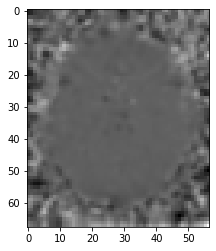

In [44]:
slice_number = 18
plt.imshow(transversal[:, :, slice_number, 0], cmap='gray')

In [63]:
def plot_slices(data, position=8):
    fig, ax = plt.subplots(1, 5, figsize=[18, 3])
    n = 0
    n_slice = 9

    for i in range(5):
        ax[i].imshow(data[:, :, n_slice], cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title('Slice number: {}'.format(n_slice), color='r')
        n_slice += position


    # fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

Coronal -- Z-axis view (along the depth -- represents each slice from top to bottom)


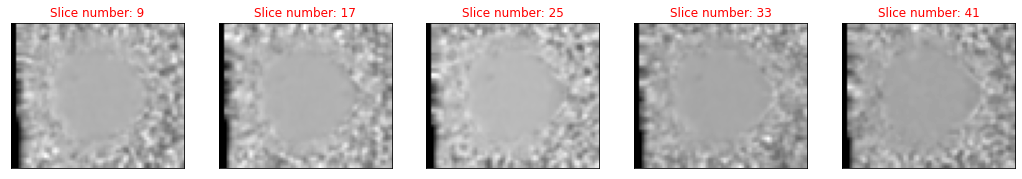

Transversal -- Y-axis view


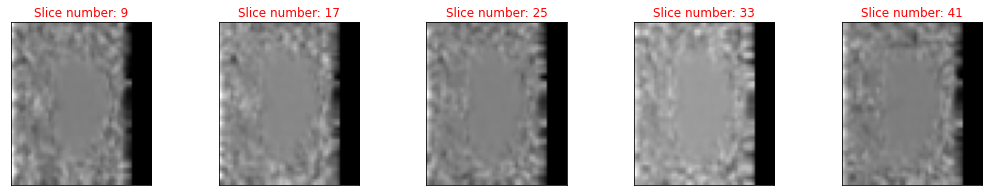

Sagittal -- X-axis view (along the surface a slice in Z-axis view)


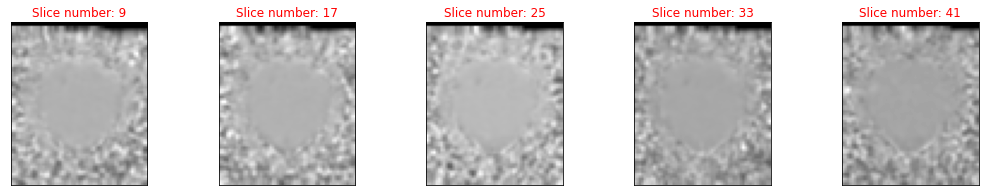

In [64]:
print('Coronal -- Z-axis view (along the depth -- represents each slice from top to bottom)')
plot_slices(coronal[13])
print('Transversal -- Y-axis view')
plot_slices(transversal[13])
print('Sagittal -- X-axis view (along the surface a slice in Z-axis view)')
plot_slices(sagittal[13])